# Introduction to Pandas

In [1]:
#Installing
# using conda
!conda install pandas
# or using pip
!pip install pandas
# using uv
!uv pip install pandas #uv env

/bin/bash: line 1: conda: command not found
Using Python 3.12.11 environment at: /usr
Audited 1 package in 270ms


In [2]:
# imports
import pandas as pd
import numpy as np

print('pandas',pd.__version__)
print('numpy',np.__version__)

pandas 2.2.2
numpy 2.0.2


## Pandas data structures

The main data structures in pandas are the `Index`, `Series` (useful for time series) and the `DataFrame`.  

- **Series**
  - Formal: One-dimensional ndarray with axis labels (including time series).
  - Roughly: You can think of it as kind of spreadsheet column or a relational database table of one column  
  

- **DataFrame**
  - Formal: Two-dimensional, size-mutable, potentially heterogeneous tabular data.
  - Roughly: to a relational database table. Where every *DataFrame's* column is a *Series*.

- Both DataFrames and Series always have an **Index**.

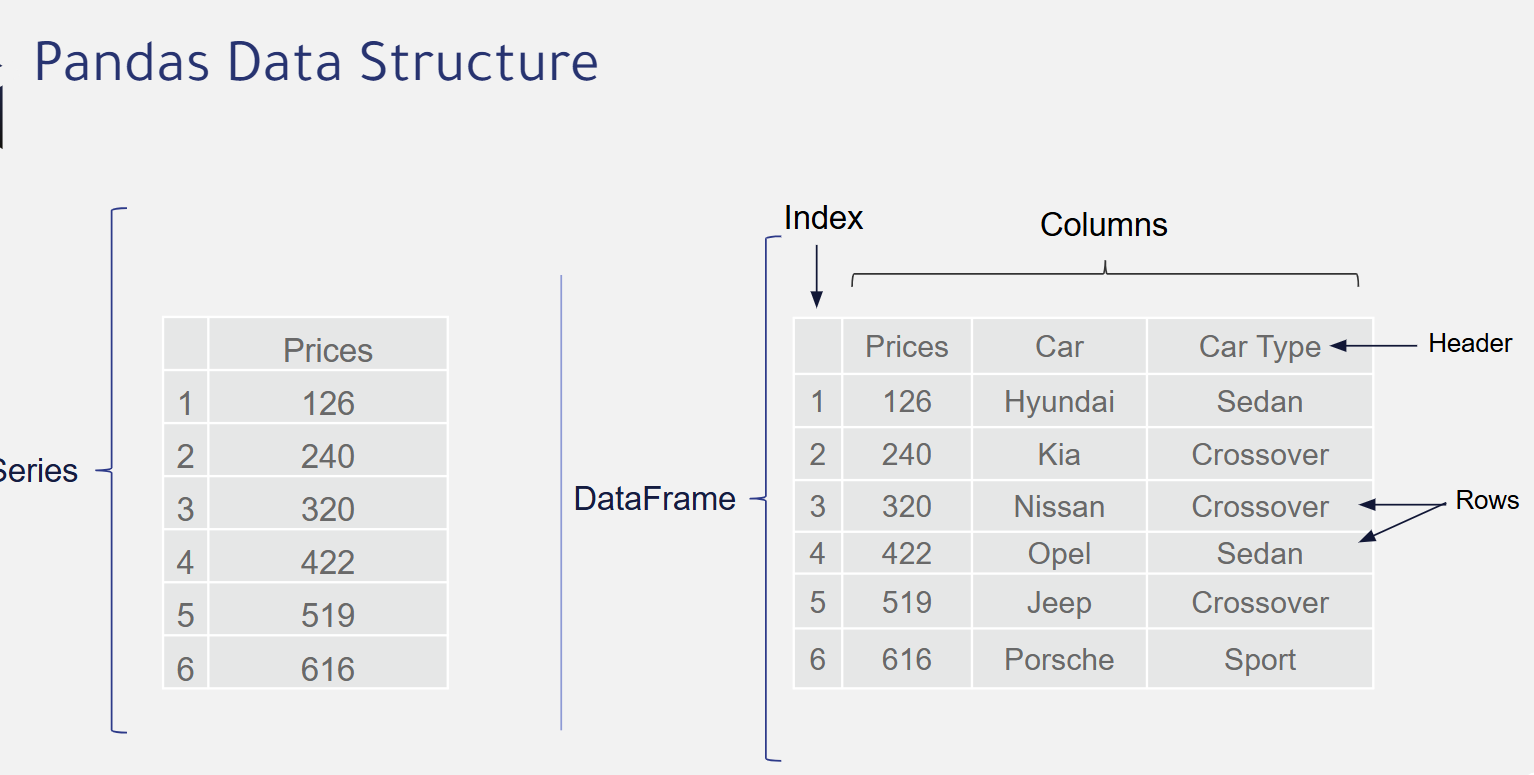

# Pandas Series

In [3]:
# One-dimensional ndarray with axis labels (including time series).
data = pd.Series([1, 2, 3, 4, 5])
data


0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
data = pd.Series([1,2,3], index=['a', 'b', 'c'])#The indices can be integers like in the example above. Alternatively, the indices can be labels.
data

a    1
b    2
c    3
dtype: int64

In [5]:
series_data = pd.Series({'A':5, 'B':3, 'C':1})#Also, Series can be easily created from dictionaries
series_data

A    5
B    3
C    1
dtype: int64

In [6]:
# series information
print(series_data.index)
print(series_data.values,'\n')
print(series_data.dtype)

Index(['A', 'B', 'C'], dtype='object')
[5 3 1] 

int64


**Common `pandas` data types:**

| Type | Description |
| --- | :-- |
| `float64` | Numpy **float** (decimal) type |
| `Int64` | Numpy **integer** type |
| `object` | Numpy type for storing **strings** |
| `category` | pandas **categorical** type |
| `bool` | Numpy **Boolean** type |
| `datetime64[ns]` | NumPy **date** type |

## Data Selection in Series

In [7]:
import pandas as pd
series_data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
series_data['b']

np.float64(0.5)

In [8]:
'b' in series_data

True

In [9]:
'b' in series_data.keys()

True

In [10]:
series_data.values.mean()

np.float64(0.625)

In [11]:
print(0.25 in series_data)
0.25 in series_data.values

False


True

In [12]:
series_data['e'] = 1.25
series_data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [13]:
# slicing by explicit index
series_data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [14]:
# slicing by implicit integer index
series_data[0:2]

a    0.25
b    0.50
dtype: float64

In [15]:
series_data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [16]:
# creating mask
(series_data > 0.3) | (series_data < 0.8)

a    True
b    True
c    True
d    True
e    True
dtype: bool

In [17]:
 # show only true data from maske layer
series_data[(series_data > 0.3) & (series_data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [18]:
# fancy indexing
series_data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Indexers: loc and iloc

If your `Series` has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, while a slicing operation like `data[1:3]` will use the implicit Python-style indices:

In [19]:
import pandas as pd
data = pd.Series(['a', 'b', 'c','d'], index=[1,2, 3, 4])#index affect the way we slice  series try remove 0
data

1    a
2    b
3    c
4    d
dtype: object

In [20]:
# explicit index when indexing
data[1]

'a'

In [21]:
# implicit index when slicing
data[1:3]

2    b
3    c
dtype: object

In [22]:
# loc with is location
print(data.loc[1:3])


1    a
2    b
3    c
dtype: object


In [24]:
#index location >>> iloc
data.iloc['a']

TypeError: Cannot index by location index with a non-integer key

In [25]:
data.iloc[1:3]

2    b
3    c
dtype: object

In [32]:
data = pd.Series(['a', 'b',"c"], index=['1', 'A2','A3'])
data

1     a
2     b
A3    c
dtype: object

In [34]:
data.loc['1']

'a'

In [28]:
data.iloc[1]#iloc its tak index number even its string

'b'

In [29]:
data.iloc['A1']

TypeError: Cannot index by location index with a non-integer key

| Feature             | `iloc` (Index Location)                                     | `loc` (Label Location)                                          |
| ------------------- | ----------------------------------------------------------- | --------------------------------------------------------------- |
| **Works with**      | Integer positions only                                      | Labels (index names) or boolean masks                           |
| **Allowed inputs**  | Integers, integer slices, lists of integers, boolean arrays | Labels, slices with labels, boolean arrays, callable conditions |
| **Raises error if** | Position is out of range                                    | Label is not found in index                                     |


### 🔥 Exercises:
### 1. Create a Series from a list of 5 numbers.

Set custom index labels like ['a', 'b', 'c', 'd', 'e'].

### 2. Create a Series from a dictionary.

Example dict: {'Math': 90, 'English': 85, 'Science': 95}.

### 3. Given a Series of numbers,

Find the mean, max, and min values.

Also, show only the numbers greater than the mean.

### 4. Given a Series with indexes [10, 20, 30, 40] and values [1, 2, 3, 4],

Select the elements with label 20 to 40 using .loc.

Select the second and third elements by position using .iloc.

# pandas DataFrame
If a `Series` is a one-dimensional indexed array, the `DataFrame` is a two-dimensional indexed array. It can be thought of as a collection of Series objects, where each Series represents a column, or as an enhanced 2D numpy array.

In a `DataFrame`, the index refers to labels for each row, while columns describe each column.

This data structure also contains labeled axes (rows and columns).

|index|First Name|Last Name|
|---|---|---|
|First|Faisal|AlKahtani|
|Second|Mohamed|Almalki|
|Third|Nora|Alzahrani|

First, let's create a `DataFrame` using random numbers generated from numpy.

In [35]:
import numpy as np

data = pd.DataFrame(np.random.random((5, 4)))
data

0         1         2         3
0  0.794593  0.749985  0.317503  0.414641
1  0.234832  0.298733  0.083867  0.811167
2  0.071992  0.440459  0.218329  0.871636
3  0.933366  0.049094  0.273178  0.840909
4  0.373140  0.082688  0.457929  0.878323

In [36]:
data = pd.DataFrame(np.random.random((5, 3)), columns=['B', 'A', 'C'])
data

B         A         C
0  0.665663  0.222457  0.328823
1  0.474428  0.106792  0.679912
2  0.675897  0.823332  0.457137
3  0.563074  0.628290  0.574896
4  0.563060  0.718698  0.301505

In [37]:
a = pd.Series([1, 2, 3])
b = pd.Series(['a', 'b', 'c', 'd'])
data = pd.DataFrame({'Numbers':a, 'Letters':b})
data

Numbers Letters
0      1.0       a
1      2.0       b
2      3.0       c
3      NaN       d

In [38]:
data = pd.DataFrame({'Country':['KSA', 'Egypt', 'UAE'],
                     'Capital':['Riyadh', 'Cairo', 'Dubai']})
data

Country Capital
0     KSA  Riyadh
1   Egypt   Cairo
2     UAE   Dubai

### Dataframe informations

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  3 non-null      object
 1   Capital  3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


In [40]:
data.index

RangeIndex(start=0, stop=3, step=1)

In [41]:
data.columns

Index(['Country', 'Capital'], dtype='object')

In [43]:
data.head(1)

Country Capital
0     KSA  Riyadh

In [45]:
data.tail(1)

Country Capital
2     UAE   Dubai

In [46]:
data.dtypes

Country    object
Capital    object
dtype: object

In [47]:
data.ndim

2

In [48]:
data.size

6

## How do I read and write tabular data?
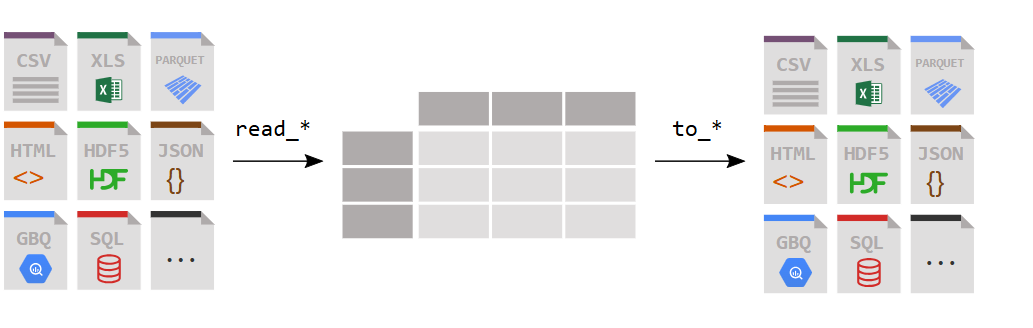

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
#reading files
rest = pd.read_csv("/content/drive/MyDrive/Bootcamps/Ai_DataScience/week3/Tutorials/Day_2/cairo_restaurants_cleaned.csv")

In [56]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   poi_name     3277 non-null   object 
 1   lat          3277 non-null   float64
 2   lng          3277 non-null   float64
 3   reviews_no   2727 non-null   float64
 4   price_range  447 non-null    object 
 5   category     3277 non-null   object 
dtypes: float64(3), object(3)
memory usage: 153.7+ KB


In [57]:
rest=rest.iloc[:, 1:]
rest

lat        lng  reviews_no           price_range    category
0     29.540509  30.979346         1.0                   NaN  Restaurant
1     29.539746  30.979202         2.0                   NaN  Restaurant
2     29.474958  30.956272         2.0                   NaN  Restaurant
3     30.038682  31.230666       123.0  Moderately expensive  Restaurant
4     30.074187  31.343988       719.0                   NaN  Restaurant
...         ...        ...         ...                   ...         ...
3272  29.928564  30.918819       169.0  Moderately expensive  Restaurant
3273  29.919669  30.932904        11.0                   NaN  Restaurant
3274  29.919301  30.944628        19.0                   NaN  Restaurant
3275  29.920757  31.054685        84.0                   NaN  Restaurant
3276  29.912976  31.058416         2.0                   NaN  Restaurant

[3277 rows x 5 columns]

In [ ]:
#save to csv
rest.to_csv("/content/drive/MyDrive/Bootcamps/Ai_DataScience/week3/Tutorials/Day_2/cairo_restaurants_cleaned.csv",index=False)

In [60]:
rest.head()

poi_name        lat        lng  reviews_no  \
0            Sultan Restaurant  29.540509  30.979346         1.0   
1                 مطعم ع الصاج  29.539746  30.979202         2.0   
2                  The Kingdom  29.474958  30.956272         2.0   
3  The Blue Restaurant & Grill  30.038682  31.230666       123.0   
4           Windows Restaurant  30.074187  31.343988       719.0   

            price_range    category  
0                   NaN  Restaurant  
1                   NaN  Restaurant  
2                   NaN  Restaurant  
3  Moderately expensive  Restaurant  
4                   NaN  Restaurant

In [61]:
rest.describe()

lat          lng    reviews_no
count  3277.000000  3277.000000   2727.000000
mean     29.864109    31.229865    246.699670
std       0.318206     0.208762   1426.643447
min      24.082226    29.656252      1.000000
25%      29.842939    31.132612      3.000000
50%      29.896887    31.277448     14.000000
75%      29.975326    31.325647     88.500000
max      31.033258    33.939234  51720.000000

In [62]:

rest['reviews_no'].describe()

count     2727.000000
mean       246.699670
std       1426.643447
min          1.000000
25%          3.000000
50%         14.000000
75%         88.500000
max      51720.000000
Name: reviews_no, dtype: float64

In [ ]:
rest.reviews_no.describe()#reviews_no columns describe

## Data Selection in DataFrames

Recall that a `DataFrame` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of `Series` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

In [63]:
rest['poi_name'].head()

0              Sultan Restaurant
1                   مطعم ع الصاج
2                    The Kingdom
3    The Blue Restaurant & Grill
4             Windows Restaurant
Name: poi_name, dtype: object

In [64]:
rest.poi_name

0                     Sultan Restaurant
1                          مطعم ع الصاج
2                           The Kingdom
3           The Blue Restaurant & Grill
4                    Windows Restaurant
                     ...               
3272                 Rosto - مطعم روستو
3273    اسواق يوسف وعلي للطيور والاسماك
3274                       مطعم ابوعبدو
3275     مطعم وكافية الحوت حدائق اكتوبر
3276                 اكتوبر الحي الاطلي
Name: poi_name, Length: 3277, dtype: object

In [65]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})
pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249,
                 'Pennsylvania': 13002700})
data = pd.DataFrame({'area':area, 'pop':pop})
data

area       pop
California    423967  39538223
Texas         695662  29145505
Florida       170312  21538187
New York      141297  20201249
Pennsylvania  119280  13002700

In [76]:
data['density'] = data['pop'] / data['area']
data

area       pop     density
California    423967  39538223   93.257784
Texas         695662  29145505   41.896072
Florida       170312  21538187  126.463121
New York      141297  20201249  142.970120
Pennsylvania  119280  13002700  109.009893

In [68]:
data.values #data array  to get only values not enhanced datafram 2d

array([[  423967, 39538223,        0],
       [  695662, 29145505,        0],
       [  170312, 21538187,        0],
       [  141297, 20201249,        0],
       [  119280, 13002700,        0]])

In [69]:
data.T

California     Texas   Florida  New York  Pennsylvania
area         423967    695662    170312    141297        119280
pop        39538223  29145505  21538187  20201249      13002700
density           0         0         0         0             0

In [70]:
data

area       pop  density
California    423967  39538223        0
Texas         695662  29145505        0
Florida       170312  21538187        0
New York      141297  20201249        0
Pennsylvania  119280  13002700        0

In [71]:
data.values[0]

array([  423967, 39538223,        0])

In [72]:
rest.head()

poi_name        lat        lng  reviews_no  \
0            Sultan Restaurant  29.540509  30.979346         1.0   
1                 مطعم ع الصاج  29.539746  30.979202         2.0   
2                  The Kingdom  29.474958  30.956272         2.0   
3  The Blue Restaurant & Grill  30.038682  31.230666       123.0   
4           Windows Restaurant  30.074187  31.343988       719.0   

            price_range    category  
0                   NaN  Restaurant  
1                   NaN  Restaurant  
2                   NaN  Restaurant  
3  Moderately expensive  Restaurant  
4                   NaN  Restaurant

In [73]:
rest.iloc[:3, :3]#[first 3 rows , first 2 columns ]

poi_name        lat        lng
0  Sultan Restaurant  29.540509  30.979346
1       مطعم ع الصاج  29.539746  30.979202
2        The Kingdom  29.474958  30.956272

In [ ]:
data

In [74]:
data.loc[:'Florida', :'pop']

area       pop
California  423967  39538223
Texas       695662  29145505
Florida     170312  21538187

In [75]:
data.iloc[:3, :2]#

area       pop
California  423967  39538223
Texas       695662  29145505
Florida     170312  21538187

In [78]:
data.loc[data.density <100, ['pop','density']]

pop    density
California  39538223  93.257784
Texas       29145505  41.896072

In [79]:
data.iloc[0, 0] = 99999999 #0 is row 2 for column with index
data

area       pop     density
California    99999999  39538223   93.257784
Texas           695662  29145505   41.896072
Florida         170312  21538187  126.463121
New York        141297  20201249  142.970120
Pennsylvania    119280  13002700  109.009893

In [82]:
data

area       pop     density
California    99999999  39538223   93.257784
Texas           695662  29145505   41.896072
Florida         170312  21538187  126.463121
New York        141297  20201249  142.970120
Pennsylvania    119280  13002700  109.009893

In [80]:
data['Florida':'Pennsylvania']

area       pop     density
Florida       170312  21538187  126.463121
New York      141297  20201249  142.970120
Pennsylvania  119280  13002700  109.009893

In [81]:
data[2:5]

area       pop     density
Florida       170312  21538187  126.463121
New York      141297  20201249  142.970120
Pennsylvania  119280  13002700  109.009893

In [83]:
data.shape

(5, 3)

In [84]:
data[data.density < 50]

area       pop    density
Texas  695662  29145505  41.896072

🔥 DataFrame Exercises:
1. Create a DataFrame with the following data:
Columns: Name, Age, City
Data:


Name	Age	City
Alice	25	New York
Bob	30	Los Angeles
Carol	22	Chicago
👉 Create it manually using a dictionary.

2. Add a new column called Score with random integers between 60 and 100.
(Hint: Use np.random.randint())

3. Select:

All rows where Age > 24.

Only the Name and City columns.

4. Change the city of Bob to "San Francisco".